In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_radars = pd.read_csv("radars.csv")
df_radars

date_heure_dernier_changement   date_heure_creation departement  \
0             2018-06-28T12:24:19Z  2018-06-28T11:06:32Z          57   
1             2018-09-05T12:20:05Z  2018-09-05T12:20:05Z          80   
2             2018-09-05T12:20:05Z  2018-09-05T12:20:05Z          91   
3             2018-09-05T12:20:05Z  2018-09-05T12:20:05Z          91   
4             2018-09-05T12:20:05Z  2018-09-05T12:20:05Z          78   
...                            ...                   ...         ...   
3345          2018-09-05T12:29:37Z  2018-09-05T12:29:37Z          81   
3346          2018-09-05T12:29:37Z  2018-09-05T12:29:37Z          86   
3347          2018-09-05T12:29:39Z  2018-09-05T12:29:39Z          87   
3348          2018-09-05T12:29:39Z  2018-09-05T12:29:39Z          88   
3349          2018-09-05T12:29:40Z  2018-09-05T12:29:40Z          90   

       latitude  longitude     id                             direction  \
0     49.119070   6.204080  12923  Vallières les Bordes vers Bellecroix   
1     49.958420   2.854790  13598                      PARIS VERS LILLE   
2     48.670290   2.279760  13599                  PARIS VERS MONTLHERY   
3     48.632120   2.406500  13600           PARIS VERS CORBEIL ESSONNES   
4     48.833130   2.085010  13601                    TRAPPES VERS PARIS   
...         ...        ...    ...                                   ...   
3345  43.896684   2.151713  16942                                   NaN   
3346  46.508771   0.471131  16943                                   NaN   
3347  45.891151   1.280403  16944                                   NaN   
3348  48.198949   6.476978  16945                                   NaN   
3349  47.573626   7.494679  16946                                   NaN   

     equipement     date_installation             type       emplacement  \
0        FARECO  2010-02-12T00:00:00Z  Radar feu rouge              METZ   
1        MORPHO  2003-11-05T00:00:00Z       Radar fixe        HEM MONACU   
2        MORPHO  2003-10-31T00:00:00Z       Radar fixe  LA VILLE DU BOIS   
3        MORPHO  2003-10-31T00:00:00Z       Radar fixe     COURCOURONNES   
4        MORPHO  2003-10-30T00:00:00Z       Radar fixe            BAILLY   
...         ...                   ...              ...               ...   
3345        NaN  2016-07-18T00:00:00Z       Itinéraire               NaN   
3346        NaN  2017-10-11T00:00:00Z       Itinéraire               NaN   
3347        NaN  2017-02-10T00:00:00Z       Itinéraire               NaN   
3348        NaN  2016-12-13T00:00:00Z       Itinéraire               NaN   
3349        NaN  2016-12-05T00:00:00Z       Itinéraire               NaN   

       route  longueur_troncon_km  vitesse_poids_lourds_kmh  \
0        NaN                  NaN                       NaN   
1         A1                  NaN                       NaN   
2       RN20                  NaN                       NaN   
3         A6                  NaN                       NaN   
4        A12                  NaN                       NaN   
...      ...                  ...                       ...   
3345  RD 612                 31.8                       NaN   
3346  RN 147                  5.3                       NaN   
3347  RN 520                 12.6                       NaN   
3348   RD 46                 20.9                       NaN   
3349  RD 419                 50.9                       NaN   

      vitesse_vehicules_legers_kmh  
0                              NaN  
1                            130.0  
2                             70.0  
3                            110.0  
4                            110.0  
...                            ...  
3345                           NaN  
3346                           NaN  
3347                           NaN  
3348                           NaN  
3349                           NaN  

[3350 rows x 15 columns]

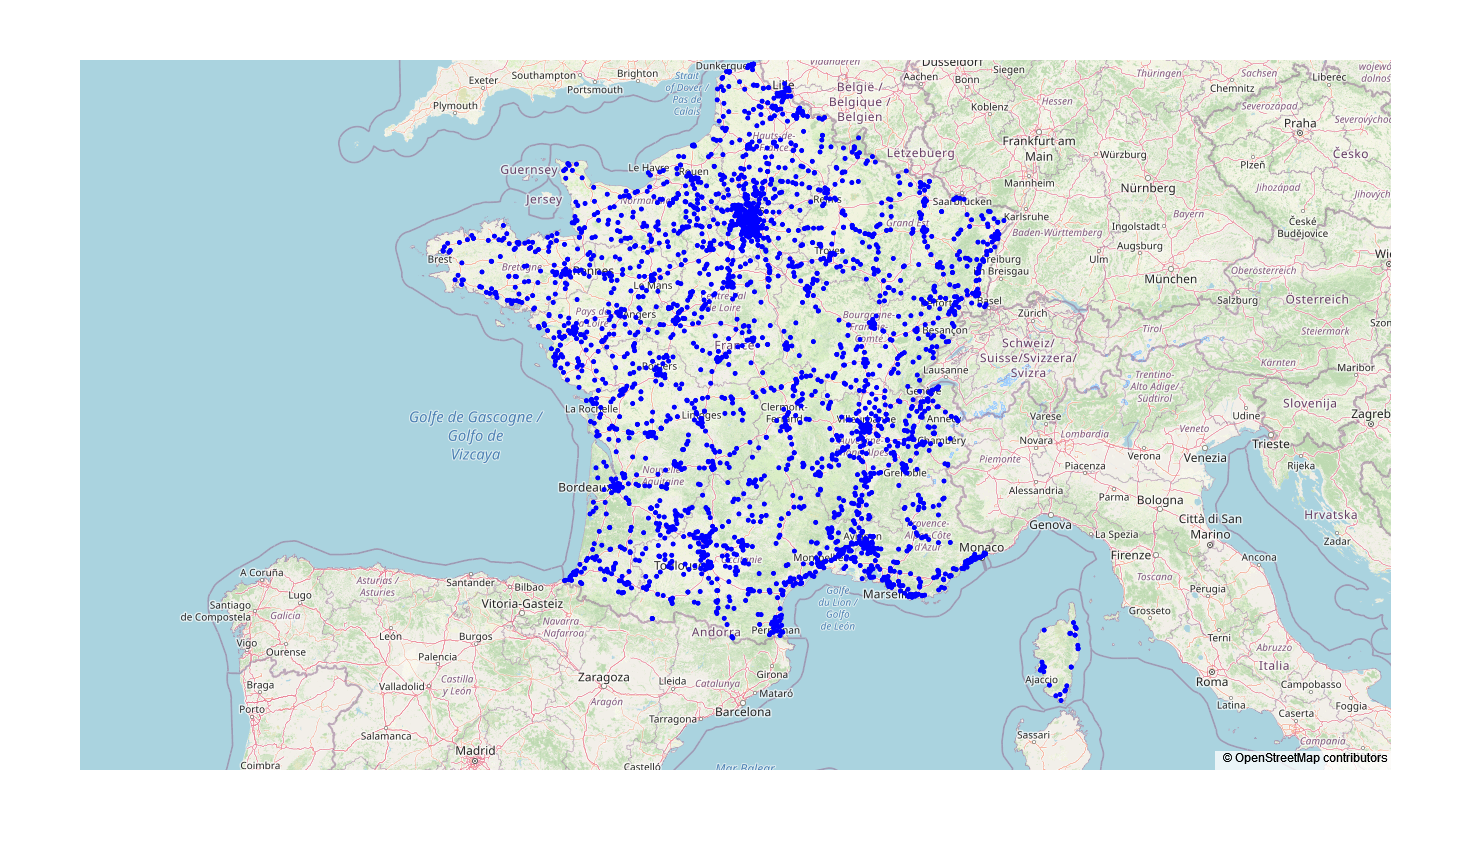

In [3]:
import plotly.express as px

fig = px.scatter_mapbox(df_radars, lat="latitude", lon="longitude", hover_name="emplacement", color_discrete_sequence=["blue"], zoom=5, height=850, width=850)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [4]:
temp = df_radars.groupby(["emplacement"])
radars_dep = temp[["id"]].count()
radars_dep['latitude'] = temp[['latitude']].mean()
radars_dep['longitude'] = temp[['longitude']].mean()
radars_dep

id   latitude  longitude
emplacement                          
ABLIS         1  48.506000   1.835700
ABREST        1  46.083080   3.461050
ABSCON        2  50.334105   3.301765
ABZAC         1  45.023000  -0.153500
ACLOU         1  49.163130   0.709350
...          ..        ...        ...
WITTENHEIM    1  47.798480   7.308400
YENNE         2  45.700165   5.791530
YERRES        1  48.719770   2.499990
YSSINGEAUX    1  45.163220   4.077760
YZEUX         1  49.987050   2.113860

[2185 rows x 3 columns]

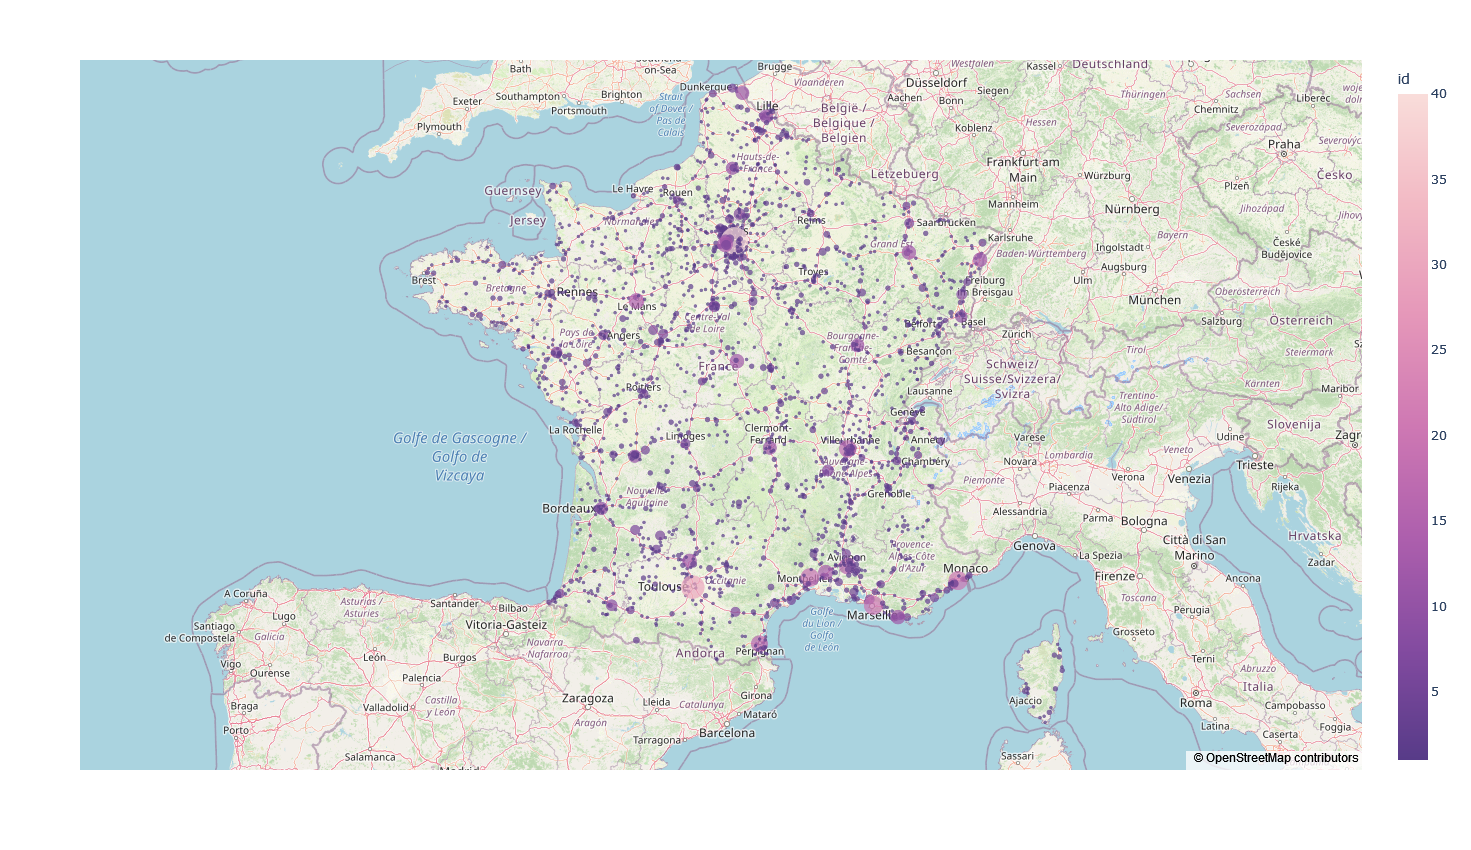

In [5]:
dep = px.scatter_mapbox(radars_dep,
                        lat="latitude",
                        lon="longitude",
                        color_discrete_sequence=["blue"],
                        zoom=5, height=850, width=850,
                        size="id", color="id", hover_name=radars_dep.index,
                        color_continuous_scale=px.colors.carto.Purpor_r)

dep.update_layout(mapbox_style="open-street-map")
dep.show()

In [6]:
radars_year = df_radars[["date_installation", "emplacement", "latitude", "longitude", "id"]]
radars_year["date_installation"] = pd.DatetimeIndex(radars_year['date_installation']).year
radars_year

C:\Users\pinot\AppData\Local\Temp\ipykernel_20232\3272653314.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date_installation       emplacement   latitude  longitude     id
0                  2010              METZ  49.119070   6.204080  12923
1                  2003        HEM MONACU  49.958420   2.854790  13598
2                  2003  LA VILLE DU BOIS  48.670290   2.279760  13599
3                  2003     COURCOURONNES  48.632120   2.406500  13600
4                  2003            BAILLY  48.833130   2.085010  13601
...                 ...               ...        ...        ...    ...
3345               2016               NaN  43.896684   2.151713  16942
3346               2017               NaN  46.508771   0.471131  16943
3347               2017               NaN  45.891151   1.280403  16944
3348               2016               NaN  48.198949   6.476978  16945
3349               2016               NaN  47.573626   7.494679  16946

[3350 rows x 5 columns]

In [7]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with radars dataset'),
    dcc.Graph(id="scatter-mapbox"),
    html.P("Filter by year:"),
    dcc.Slider(2003, 2018, 1,
               value=2003,
               id="range-slider"
    ),
])


@app.callback(
    Output("scatter-mapbox", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = radars_year # replace with your own data source
    value = slider_range
    mask = df['date_instalaltion'] <= value
    fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="emplacement", color_discrete_sequence=["blue"], zoom=5, height=850, width=850)
    return fig


app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\pinot\anaconda3\envs\PyBD\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

